In [1]:
import numpy as np
import pandas as pd

In [2]:
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.model_selection import cross_val_score

In [7]:
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [12]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [36]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [19]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:3],df.iloc[:,0],test_size=0.2,random_state=42)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


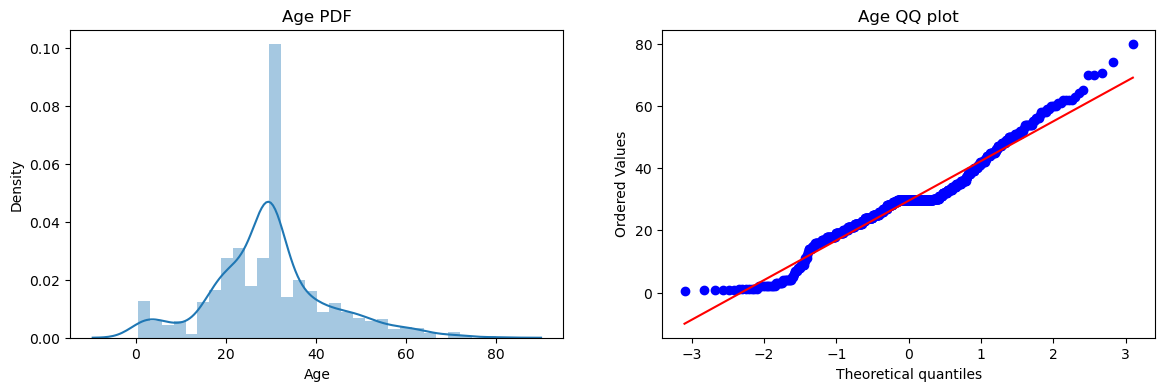

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ plot')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


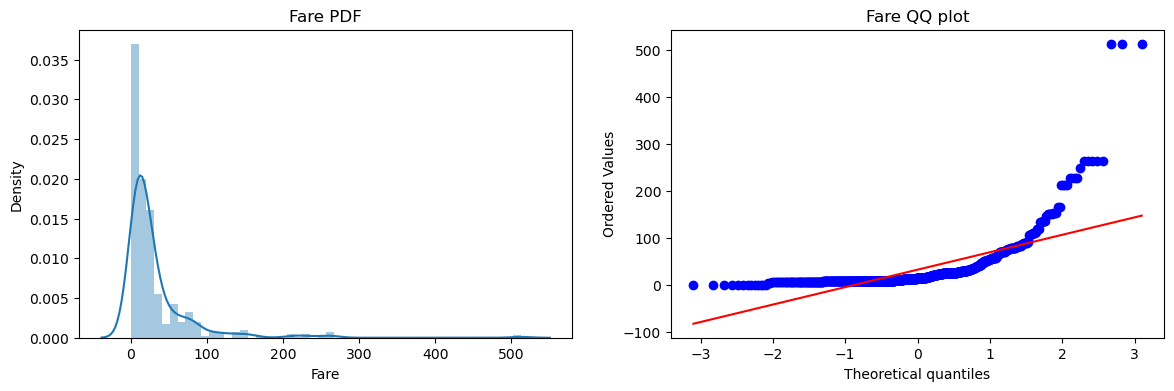

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ plot')
plt.show()

In [25]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [26]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred=clf.predict(X_test)
y_pred2=clf2.predict(X_test)
print("Accuracy Logistic Regression = ",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree = ",accuracy_score(y_test,y_pred2))

Accuracy Logistic Regression =  0.6480446927374302
Accuracy Decision Tree =  0.664804469273743


In [30]:
trf=FunctionTransformer(np.log1p)

In [31]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [32]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [33]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [34]:
y_pred=clf.predict(X_test_transformed)
y_pred2=clf2.predict(X_test_transformed)
print("Accuracy Logistic Regression = ",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree = ",accuracy_score(y_test,y_pred2))

Accuracy Logistic Regression =  0.6815642458100558
Accuracy Decision Tree =  0.6703910614525139


In [35]:
## Accuracy of LR increased... We need to recheck it

In [37]:
X_transformed=trf.fit_transform(X) ##ekhane X = Xtrain+ Xtest

In [38]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [39]:
print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6622222222222223


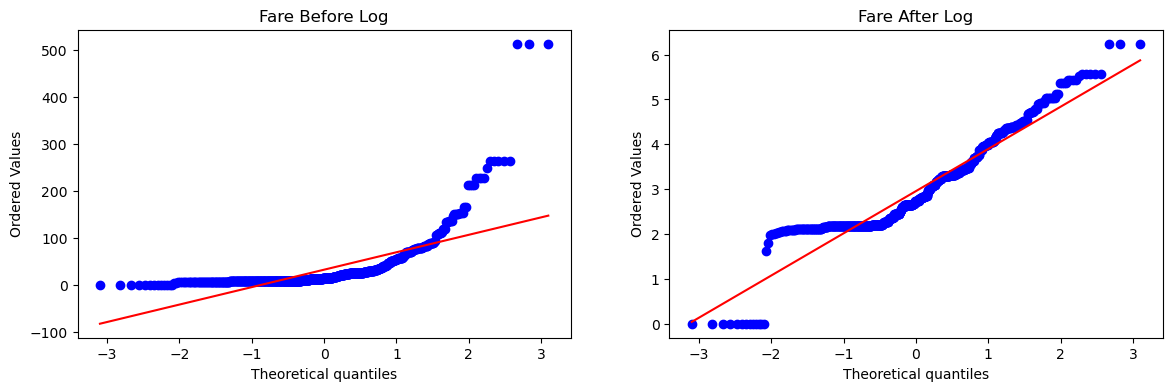

In [40]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

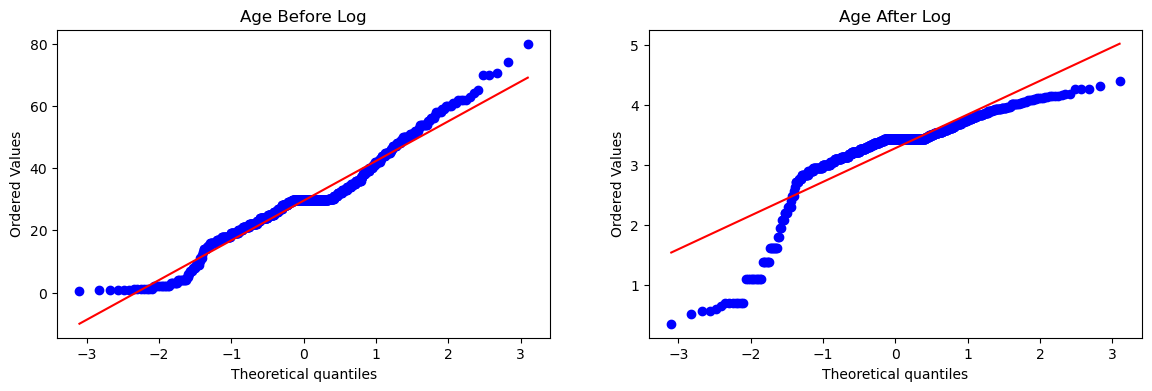

In [42]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()  

#Age a log dewar dorkar chilona...Let's apply that using coltransform

In [43]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [45]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred1 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6927374301675978


In [46]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6712609238451936


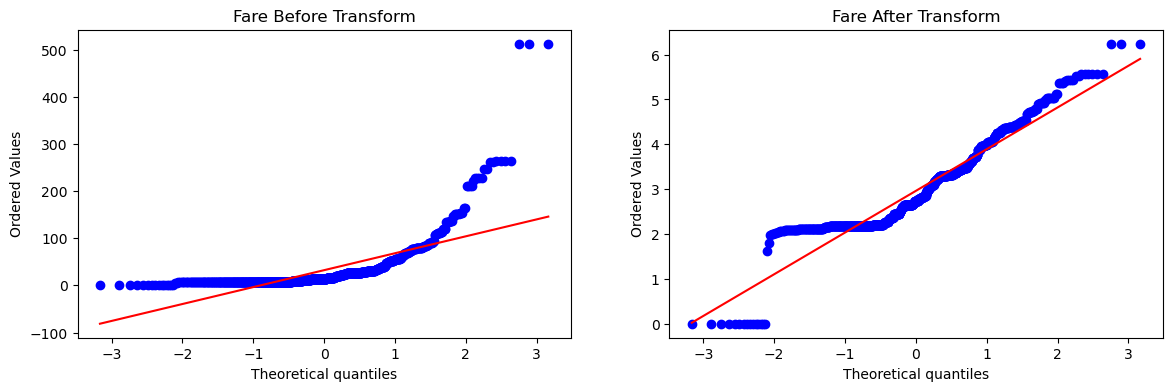

In [52]:
apply_transform(np.log1p)